In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# load dataset
df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Define target and predictors
y = df['target']
X = df.drop('target', axis=1)


In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [5]:
from sklearn.preprocessing import StandardScaler

# Instantiate scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Instantiate logistic regression
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg.fit(X_train, y_train)


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [7]:
# Predict on training and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)


In [ ]:
# Number of correct predict on training data
train_correct = np.sum(y_hat_train == y_train)
print(f"Correct predictions on training set: {train_correct} out of {len(y_train)}")


Correct predictions on training set: 195 out of 227


In [10]:
# Number of correct predicts on test data
test_correct = np.sum(y_hat_test == y_test)
print(f"Correct predictions on test set: {test_correct} out of {len(y_test)}")


Correct predictions on test set: 63 out of 76


Gradient Descent


In [11]:
def predict_y(X, w): 
    return np.dot(X, w)


In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


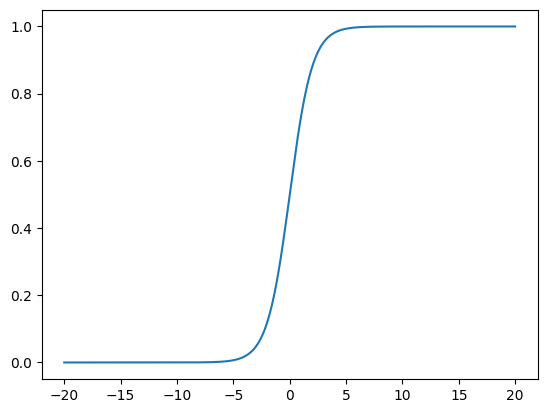

In [14]:
import matplotlib.pyplot as plt

x_vals = np.linspace(-20, 20, 10000)
sigmoid_vals = sigmoid(x_vals)
plt.plot(x_vals, sigmoid_vals)


In [21]:
# Set parameters
max_iterations = 1000
alpha = 0.01


def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    # Initialize weights
    if initial_weights is None:
        w = np.ones(X.shape[1])
    else:
        w = initial_weights

    weights_history = [w.copy()]

    # Gradient descent loop
    for _ in range(max_iterations):
        z = predict_y(X, w)
        predictions = sigmoid(z)
        error_vector = y - predictions
        gradient = np.dot(X.T, error_vector)
        w += alpha * gradient
        weights_history.append(w.copy())

    return w, weights_history




In [22]:

df = pd.read_csv('heart.csv')


In [23]:
y = df['target'].values
X = df.drop(columns=['target']).values


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [25]:
weights, weights_history = grad_desc(X, y, max_iterations=1000, alpha=0.01)


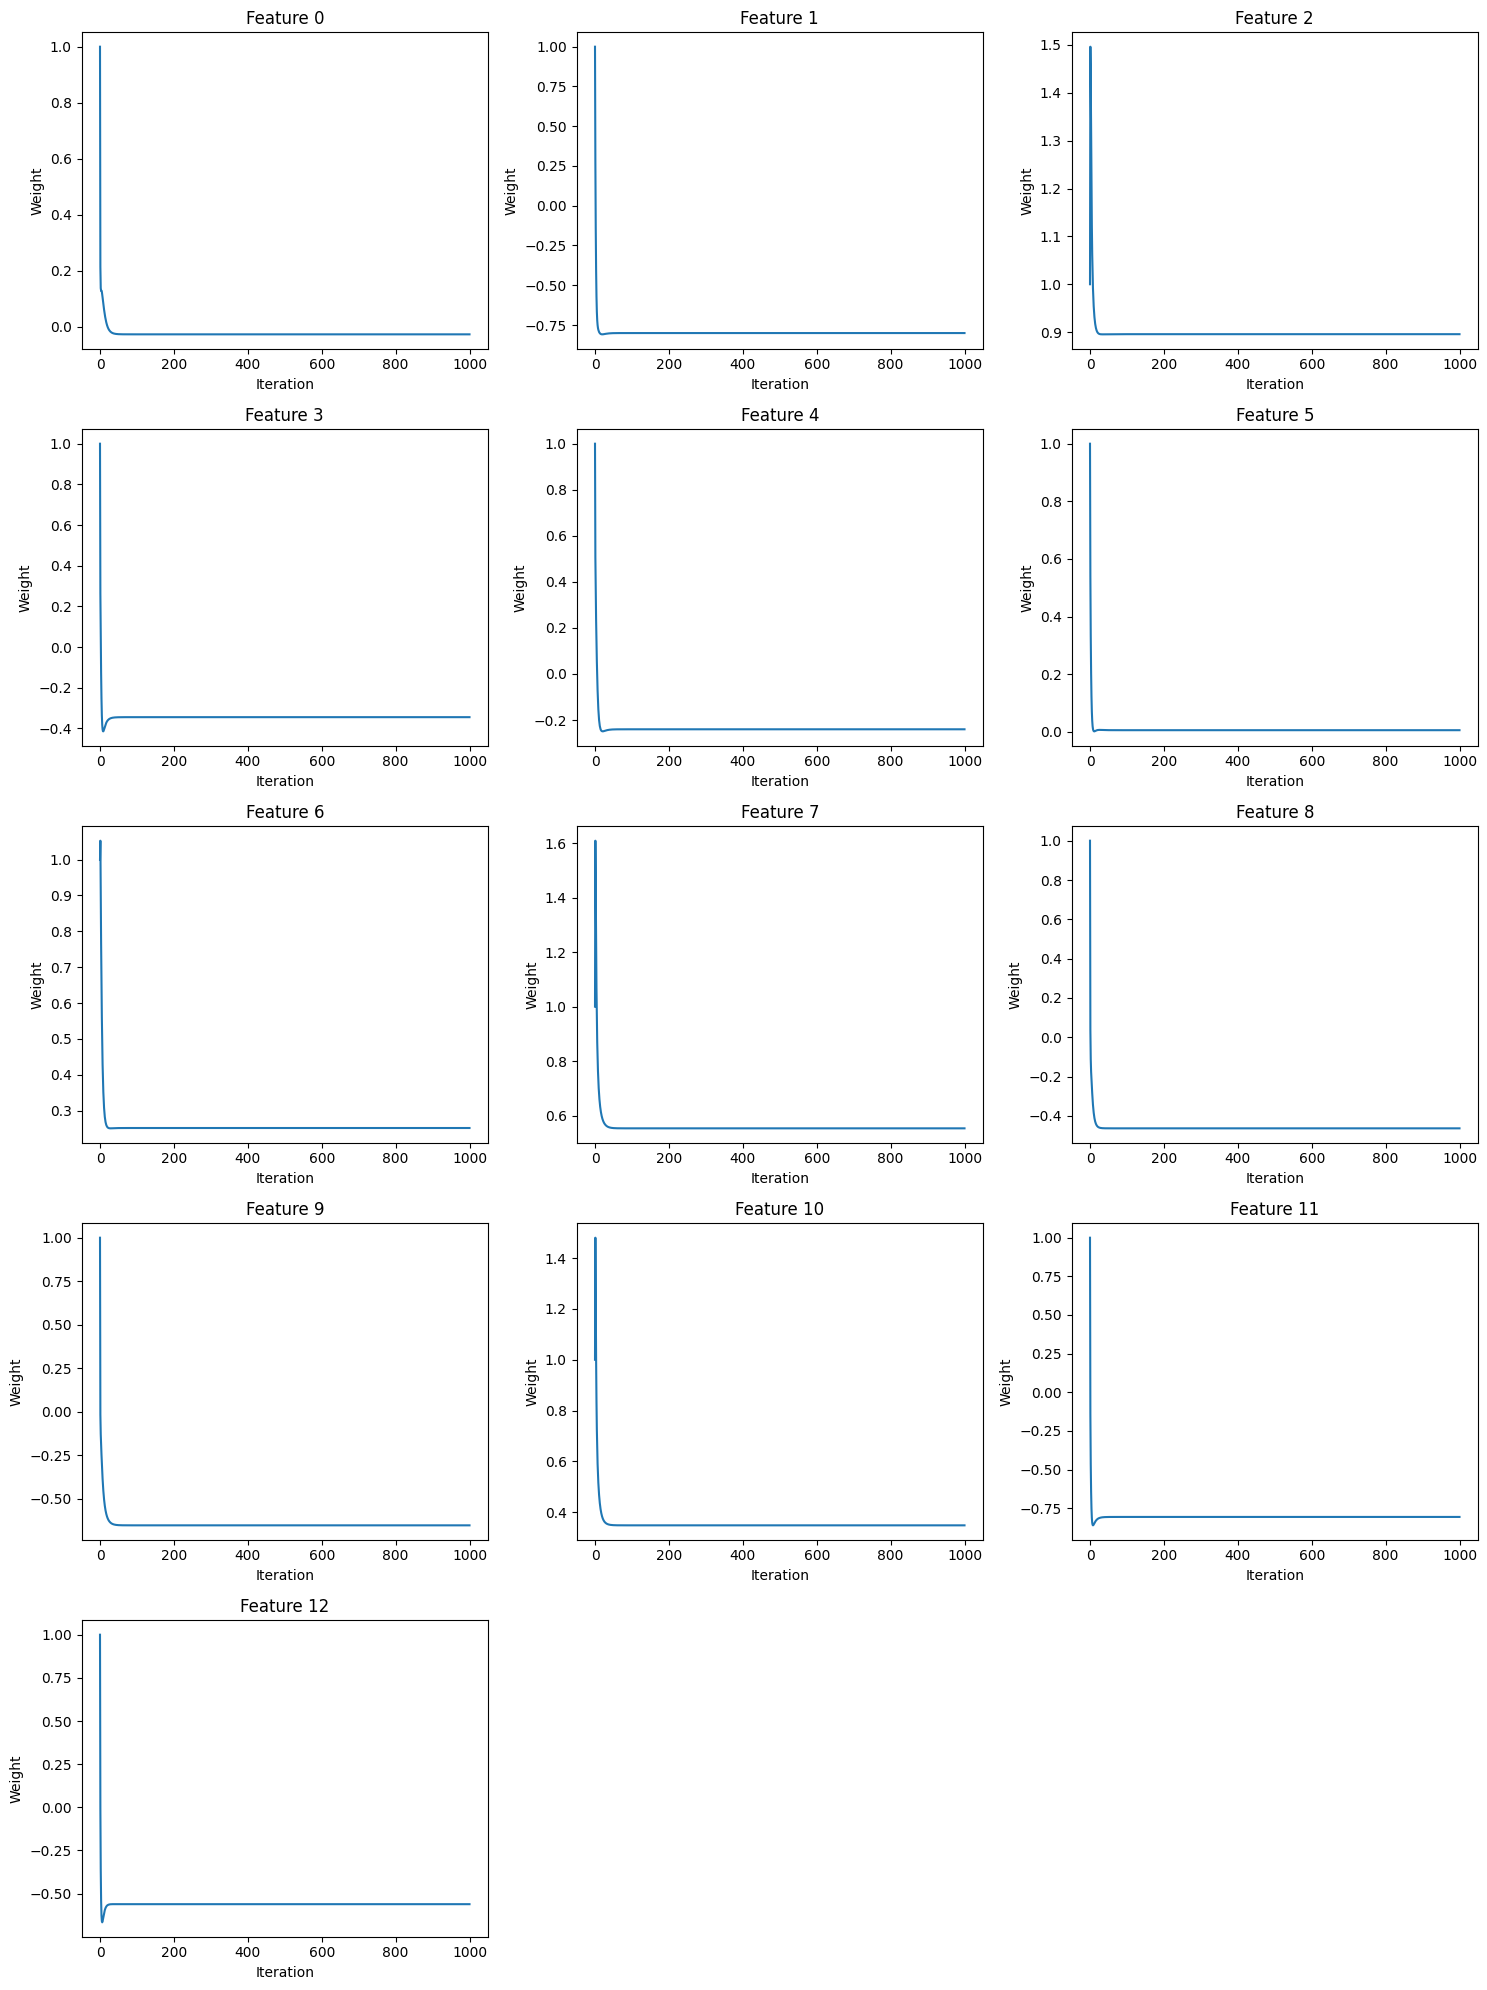

In [ ]:
import matplotlib.pyplot as plt

weights_array = np.array(weights_history)

num_features = X.shape[1]
rows = (num_features + 2) // 3  
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 4 * rows))

axes = axes.flatten()

for i in range(num_features):
    axes[i].plot(weights_array[:, i])
    axes[i].set_title(f'Feature {i}')
    axes[i].set_xlabel('Iteration')
    axes[i].set_ylabel('Weight')


for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
